### 11. Repeat the previous exercise, but now fit a nonlinear AR model by “fattening” the short sequences produced for the RNN model.

In [1]:
import pandas as pd
import numpy as np
from ISLP import load_data

In [2]:
df = load_data('NYSE')

In [3]:
df

,day_of_week,DJ_return,log_volume,log_volatility,train
date,,,,,
1962-12-03,mon,-0.004461,0.032573,-13.127403,True
1962-12-04,tues,0.007813,0.346202,-11.749305,True
1962-12-05,wed,0.003845,0.525306,-11.665609,True
1962-12-06,thur,-0.003462,0.210182,-11.626772,True
1962-12-07,fri,0.000568,0.044187,-11.728130,True
...,...,...,...,...,...
1986-12-24,wed,0.006514,-0.236104,-9.807366,False
1986-12-26,fri,0.001825,-1.322425,-9.906025,False
1986-12-29,mon,-0.009515,-0.371237,-9.827660,False


In [4]:
df.index = df.index.astype(np.datetime64)

In [5]:
df = pd.get_dummies(df, columns=['day_of_week'])

In [6]:
df

,DJ_return,log_volume,log_volatility,train,day_of_week_fri,day_of_week_mon,day_of_week_thur,day_of_week_tues,day_of_week_wed
date,,,,,,,,,
1962-12-03,-0.004461,0.032573,-13.127403,True,0,1,0,0,0
1962-12-04,0.007813,0.346202,-11.749305,True,0,0,0,1,0
1962-12-05,0.003845,0.525306,-11.665609,True,0,0,0,0,1
1962-12-06,-0.003462,0.210182,-11.626772,True,0,0,1,0,0
1962-12-07,0.000568,0.044187,-11.728130,True,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1986-12-24,0.006514,-0.236104,-9.807366,False,0,0,0,0,1
1986-12-26,0.001825,-1.322425,-9.906025,False,1,0,0,0,0
1986-12-29,-0.009515,-0.371237,-9.827660,False,0,1,0,0,0


In [7]:
x = df.drop(columns=['train'])

In [8]:
x_lag5 = x.copy()
for i in range(5, 0, -1):
    x_lag5[f'DJ_return_lag_{i}'] = x_lag5['DJ_return'].shift(i)
    x_lag5[f'log_volatility_lag_{i}'] = x_lag5['log_volatility'].shift(i)
    x_lag5[f'log_volume_lag_{i}'] = x_lag5['log_volume'].shift(i)
x_lag5.dropna(inplace=True)
x_lag5

,DJ_return,log_volume,log_volatility,day_of_week_fri,day_of_week_mon,day_of_week_thur,day_of_week_tues,day_of_week_wed,DJ_return_lag_5,log_volatility_lag_5,...,log_volume_lag_4,DJ_return_lag_3,log_volatility_lag_3,log_volume_lag_3,DJ_return_lag_2,log_volatility_lag_2,log_volume_lag_2,DJ_return_lag_1,log_volatility_lag_1,log_volume_lag_1
date,,,,,,,,,,,,,,,,,,,,,
1962-12-10,-0.010824,0.133246,-10.872526,0,1,0,0,0,-0.004461,-13.127403,...,0.346202,0.003845,-11.665609,0.525306,-0.003462,-11.626772,0.210182,0.000568,-11.728130,0.044187
1962-12-11,0.000124,-0.011528,-10.977797,0,0,0,1,0,0.007813,-11.749305,...,0.525306,-0.003462,-11.626772,0.210182,0.000568,-11.728130,0.044187,-0.010824,-10.872526,0.133246
1962-12-12,0.003358,0.001607,-11.012360,0,0,0,0,1,0.003845,-11.665609,...,0.210182,0.000568,-11.728130,0.044187,-0.010824,-10.872526,0.133246,0.000124,-10.977797,-0.011528
1962-12-13,-0.003296,-0.106437,-11.047108,0,0,1,0,0,-0.003462,-11.626772,...,0.044187,-0.010824,-10.872526,0.133246,0.000124,-10.977797,-0.011528,0.003358,-11.012360,0.001607
1962-12-14,0.004469,-0.138269,-11.022063,1,0,0,0,0,0.000568,-11.728130,...,0.133246,0.000124,-10.977797,-0.011528,0.003358,-11.012360,0.001607,-0.003296,-11.047108,-0.106437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986-12-24,0.006514,-0.236104,-9.807366,0,0,0,0,1,-0.009262,-9.559975,...,0.025079,0.008345,-9.644138,0.986704,-0.001385,-9.746214,0.366152,-0.006150,-9.782214,0.450780
1986-12-26,0.001825,-1.322425,-9.906025,1,0,0,0,0,-0.002866,-9.652473,...,0.986704,-0.001385,-9.746214,0.366152,-0.006150,-9.782214,0.450780,0.006514,-9.807366,-0.236104
1986-12-29,-0.009515,-0.371237,-9.827660,0,1,0,0,0,0.008345,-9.644138,...,0.366152,-0.006150,-9.782214,0.450780,0.006514,-9.807366,-0.236104,0.001825,-9.906025,-1.322425


In [9]:
y = x_lag5['log_volume']

In [10]:
x_lag5.drop(columns=['DJ_return', 'log_volume', 'log_volatility'], inplace=True)
x_lag5.columns

Index(['day_of_week_fri', 'day_of_week_mon', 'day_of_week_thur',
       'day_of_week_tues', 'day_of_week_wed', 'DJ_return_lag_5',
       'log_volatility_lag_5', 'log_volume_lag_5', 'DJ_return_lag_4',
       'log_volatility_lag_4', 'log_volume_lag_4', 'DJ_return_lag_3',
       'log_volatility_lag_3', 'log_volume_lag_3', 'DJ_return_lag_2',
       'log_volatility_lag_2', 'log_volume_lag_2', 'DJ_return_lag_1',
       'log_volatility_lag_1', 'log_volume_lag_1'],
      dtype='object')

In [11]:
import torch
from torch import nn

class non_linear_AR(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.sequential = nn.Sequential(nn.Flatten(),
                                        nn.Linear(20, 32),
                                        nn.ReLU(),
                                        nn.Dropout(0.5),
                                        nn.Linear(32, 1))
                                        
    def forward(self, x):
        return torch.flatten(self.sequential(x))

In [12]:
model = non_linear_AR()

In [13]:
from torch.utils.data import TensorDataset

datasets = []
train = df['train']

for mask in [train, ~train]:
    x_t = torch.tensor(x_lag5[mask].values.astype(np.float32))
    y_t = torch.tensor(y[mask].values.astype(np.float32))
    datasets.append(TensorDataset(x_t, y_t))
df_train, df_test = datasets
df_train

/var/folders/dn/b1v03x2s66s_95cdb1xkwqf40000gn/T/ipykernel_12147/2428072903.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_t = torch.tensor(x_lag5[mask].values.astype(np.float32))


In [14]:
from torchinfo import summary
summary(model, input_data=x_t, col_names=['input_size', 'output_size'])

Layer (type:depth-idx)                   Input Shape               Output Shape
non_linear_AR                            [1770, 20]                [1770]
├─Sequential: 1-1                        [1770, 20]                [1770, 1]
│    └─Flatten: 2-1                      [1770, 20]                [1770, 20]
│    └─Linear: 2-2                       [1770, 20]                [1770, 32]
│    └─ReLU: 2-3                         [1770, 32]                [1770, 32]
│    └─Dropout: 2-4                      [1770, 32]                [1770, 32]
│    └─Linear: 2-5                       [1770, 32]                [1770, 1]
Total params: 705
Trainable params: 705
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 1.25
Input size (MB): 0.14
Forward/backward pass size (MB): 0.47
Params size (MB): 0.00
Estimated Total Size (MB): 0.61

In [15]:
from ISLP.torch import SimpleDataModule, SimpleModule
from torch.optim import RMSprop
from torchmetrics import R2Score

optim = RMSprop(model.parameters(), lr=0.001)
module = SimpleModule.regression(model, metrics={'r2' : R2Score()}, optimizer=optim)

data_module = SimpleDataModule(df_train, df_test, batch_size=64, num_workers=4)

In [16]:
from pytorch_lightning import Trainer
from ISLP.torch import ErrorTracker

trainer = Trainer(deterministic=True, max_epochs=200, callbacks=([ErrorTracker()]))
trainer.fit(module, datamodule=data_module)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:67: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default

  | Name  | Type          | Params
----------------------------------------
0 | model | non_linear_AR | 705   
1 | loss  | MSELoss       | 0     
----------------------------------------
705       Trainable params
0         Non-trainable params
705       Total params
0.003     Total 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pytorch_lightning/utilities/data.py:104: Total length of `DataLoader` across ranks is zero. Please make sure this was your intention.


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=200` reached.


In [17]:
trainer.test(module, datamodule=data_module)

Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss           0.03238341957330704
         test_r2            0.4371100664138794
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 0.03238341957330704, 'test_r2': 0.4371100664138794}]

In [18]:
model.eval()
yhat = model(x_t)
yhat = yhat.detach().numpy()

/var/folders/dn/b1v03x2s66s_95cdb1xkwqf40000gn/T/ipykernel_12147/3950799663.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(x_lag5[~train].index, y[~train], color='r', label='True')
/var/folders/dn/b1v03x2s66s_95cdb1xkwqf40000gn/T/ipykernel_12147/3950799663.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(x_lag5[~train].index, yhat, color='blue', label='Predicted')


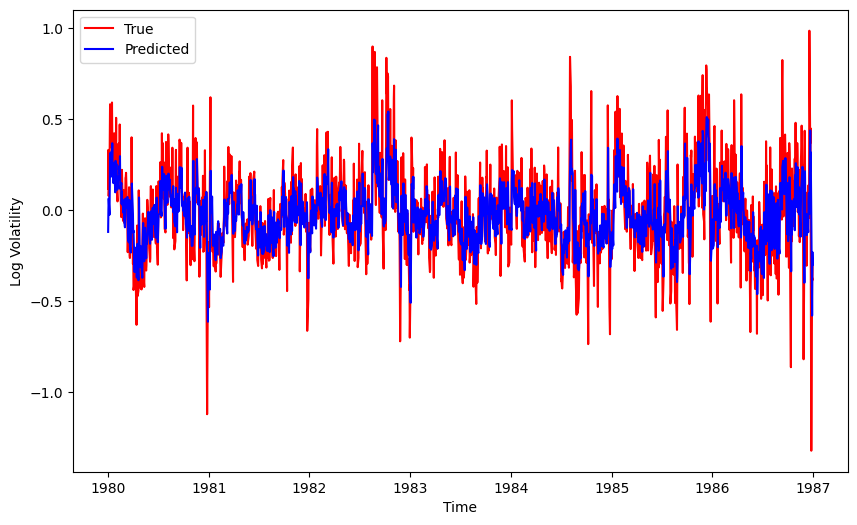

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(x_lag5[~train].index, y[~train], color='r', label='True')
plt.plot(x_lag5[~train].index, yhat, color='blue', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Log Volatility')
plt.legend()
plt.show()